In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

## Generating Data

In [2]:
data = make_blobs(n_samples=300,
                  n_features=2,
                  centers=2,
                  cluster_std=1.0,random_state=101)

In [3]:
X,y = data

## Creating Noise

In [4]:
np.random.seed(101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [5]:
feature = pd.DataFrame(X)
feature = pd.concat([feature,z_noise],axis=1)
feature.columns = ['X1','X2','X3']

In [6]:
feature.head(3)

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969


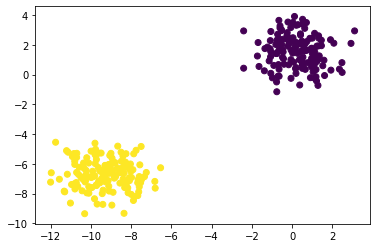

In [7]:
plt.scatter(feature['X1'],feature['X2'],c=y)

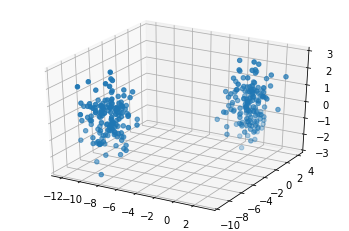

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(feature['X1'],feature['X2'],feature['X3'])

## Model

In [9]:
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [10]:
autoencoder = Sequential([encoder,decoder])

autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [11]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feature)

In [12]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Train on 300 samples
Epoch 1/5
300/300 [==============================] - 1s 3ms/sample - loss: 0.2056
Epoch 2/5
300/300 [==============================] - 0s 73us/sample - loss: 0.1119
Epoch 3/5
300/300 [==============================] - 0s 80us/sample - loss: 0.1053
Epoch 4/5
300/300 [==============================] - 0s 77us/sample - loss: 0.1032
Epoch 5/5
300/300 [==============================] - 0s 90us/sample - loss: 0.1023


In [15]:
encoded_2dim = encoder.predict(scaled_data)
encoded_2dim.shape

(300, 2)

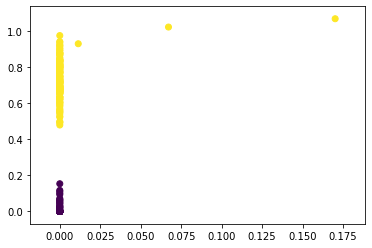

In [17]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)